<a href="https://colab.research.google.com/github/sheldonkemper/portfolio/blob/main/CAM_DS_C101_Activity_2_3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 2.3.5 Building models and interpreting results

## Scenario
You are a data scientist working for a retail consumer good company that seeks to deepen its understanding of customer behaviour to enhance satisfaction and loyalty. Your client, a national retail chain, is keen to leverage its extensive customer loyalty data set to reveal the relationship between satisfaction levels and potential influencing factors, such as perceived product quality, price fairness, brand trust, community outreach efforts, and the impact of negative publicity.

Your primary goal is to develop a predictive model to help the client optimise its strategic initiatives in order to refine their marketing efforts, improve product offerings, optimise customer engagement, and drive growth and market share.


## Objective
The goal is to:
- review and reinforce key concepts related to regression analysis, including understanding coefficients and residuals
- explore the importance of evaluating regression models for their predictive power and the practical application of metrics like $R^2$, adjusted-$R^2$, and RSS.

## Assessment criteria
Evidence critical analysis of outputs to evaluate predictive models, accurately interpreting relevant metrics to ensure generalisability.


## Activity guidance
1. Import the necessary libraries and load the data set.
2. Split the data set into features (`X`) and the target variable (`y`). In this case the variable 'Loyalty' is the target variable.
3. Check if there are any features that are not suitable or required to be included in the regression model.
3. Create a regression model using Python (utilise scikit-learn) to predict the target variable based on the features.
4. Calculate the $R^2$ and adjusted-$R^2$ values to assess the model's explanatory power.
5. Calculate the residual sum of squares (RSS) to quantify the model's error.
6. Experiment with different sets of independent variables or model configurations to see how it affects $R^2$, adjusted-$R^2$, and RSS.
7. Explore the data set, experiment with model configurations, and think critically about the practical implications of your findings.


> Start your activity here. Select the pen from the toolbar to add your entry.

In [66]:
#Step 1: Import the libraries you need for this model.
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt #Visualisation
import seaborn as sns #Visualisation
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.linear_model import LinearRegression  # Linear Regression model
from sklearn.metrics import mean_squared_error, r2_score  # Model evaluation
import statsmodels.api as sm

# Load the data.
data = pd.read_csv("https://raw.githubusercontent.com/nixzach/cam_dsb/main/Loyalty.csv")
data.head(10)

,CustomerID,Loyalty,Price,Quality,Community Outreach,Trust,Customer satisfaction,Negative publicity
0,1525,6.145,10.00,0.87,-0.07,7.45,0.78,0.04
1,1531,6.033,10.00,0.93,0.14,7.62,0.90,0.05
2,1526,6.531,10.00,0.86,-0.02,7.48,0.85,0.06
3,1523,6.834,10.00,0.92,0.29,7.39,0.87,0.06
4,1524,6.642,10.00,0.85,0.05,7.42,0.66,0.07
5,1534,6.378,10.00,0.92,0.03,7.71,0.94,0.07
6,1462,3.596,7.48,0.75,-0.02,5.86,0.89,0.08
7,1460,3.333,7.43,0.64,-0.01,5.74,0.84,0.08
8,1463,3.483,7.54,0.68,0.03,5.93,0.91,0.09
9,1533,6.375,10.00,0.90,-0.07,7.68,0.92,0.10


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             1711 non-null   int64  
 1   Loyalty                1711 non-null   float64
 2   Price                  1711 non-null   float64
 3   Quality                1711 non-null   float64
 4   Community Outreach     1711 non-null   float64
 5   Trust                  1711 non-null   float64
 6   Customer satisfaction  1711 non-null   float64
 7   Negative publicity     1711 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 107.1 KB


In [68]:
data.describe()

,CustomerID,Loyalty,Price,Quality,Community Outreach,Trust,Customer satisfaction,Negative publicity
count,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000
mean,956.806546,5.445985,9.129760,0.810345,-0.000625,6.320374,0.739527,0.751163
std,562.449054,1.135628,0.941237,0.121453,0.162179,0.768282,0.142846,0.185918
min,1.000000,2.375000,6.680000,0.290000,-0.340000,3.230000,0.260000,0.040000
25%,468.500000,4.595000,8.390000,0.740000,-0.110000,5.820000,0.640000,0.700000
50%,968.000000,5.364000,9.460000,0.830000,-0.030000,6.510000,0.760000,0.810000
75%,1436.500000,6.254000,10.000000,0.910000,0.090000,6.860000,0.850000,0.870000
max,1949.000000,7.971000,10.000000,0.990000,0.690000,7.710000,0.990000,0.980000


**Split the data set into features (X) and the target variable (y). In this case the variable 'Loyalty' is the target variable.**

In [69]:
X = data.drop('Loyalty', axis=1)
y = data['Loyalty']

**Check if there are any features that are not suitable or required to be included in the regression model.**

In [70]:
data.isnull().sum()

CustomerID               0
Loyalty                  0
Price                    0
Quality                  0
Community Outreach       0
Trust                    0
Customer satisfaction    0
Negative publicity       0
dtype: int64

In [71]:
data.nunique()

CustomerID               1710
Loyalty                  1394
Price                     301
Quality                    65
Community Outreach         93
Trust                     317
Customer satisfaction      71
Negative publicity         93
dtype: int64

Looking at the output, all features seem to have a reasonable number of  unique values relative to the number of rows. A high number of unique values would indicate a features with high variability which is good for predictions but could also lead to overfitting if not handled correctly. A low number of unique values suggest low variability with very few unique values ( like 1 and 2) are essentially constant or near constant and usually dont provide much predicitive power in regression testing.

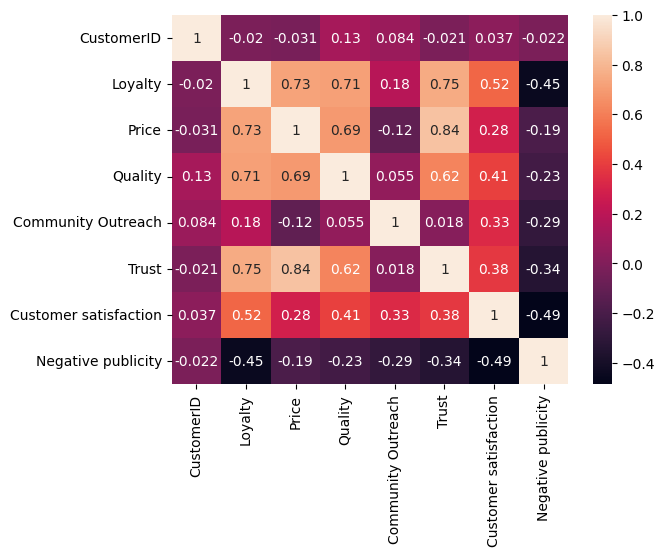

In [72]:
#Check for Multicollinearity:
# Calculate correlation matrix
corr_matrix = data.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

The multicollinearity shows a high correlation between loyalty and proce (0.85).There is also a close relation with Price and Trust.

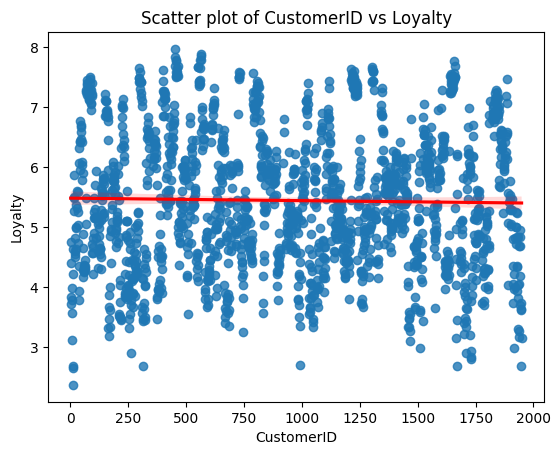

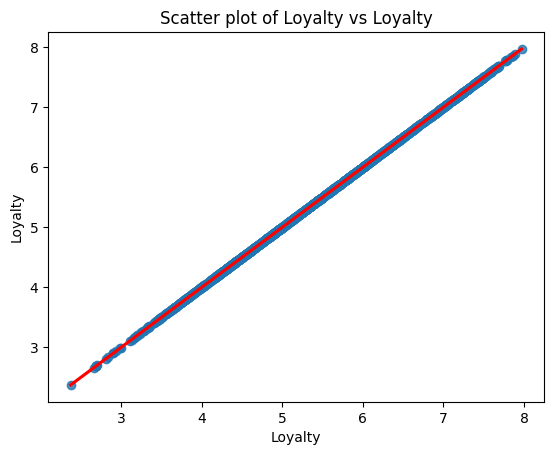

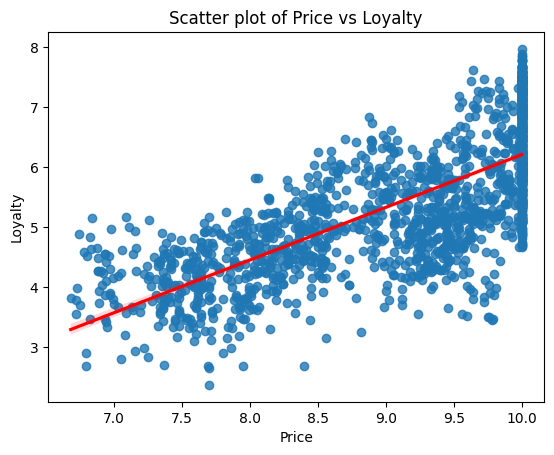

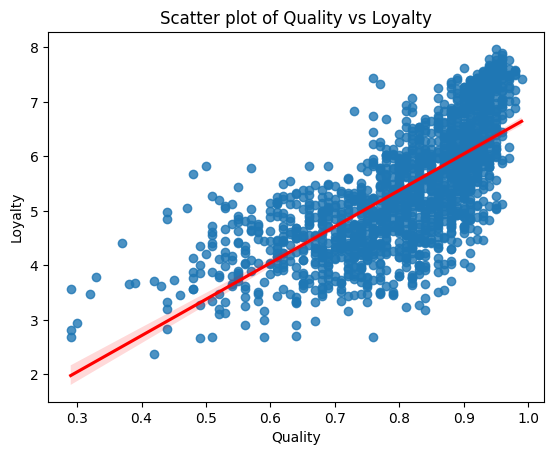

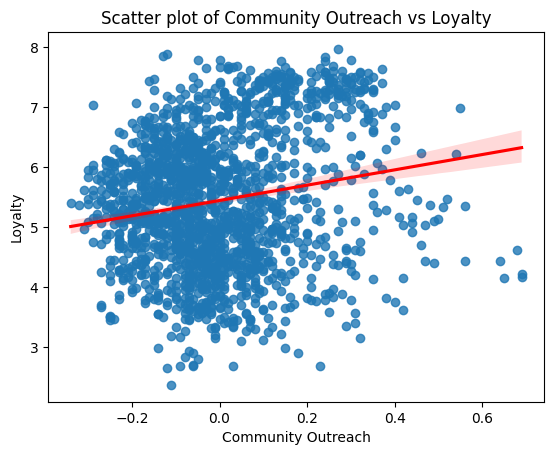

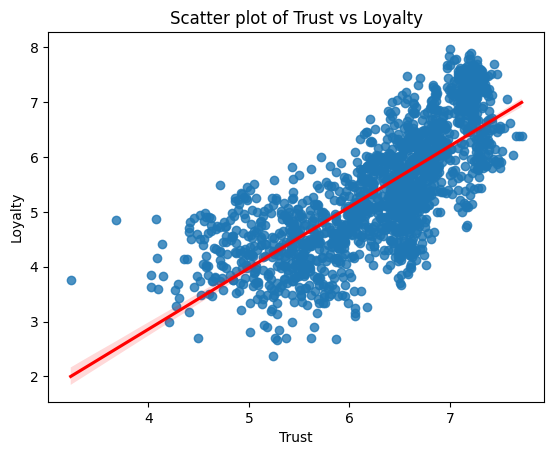

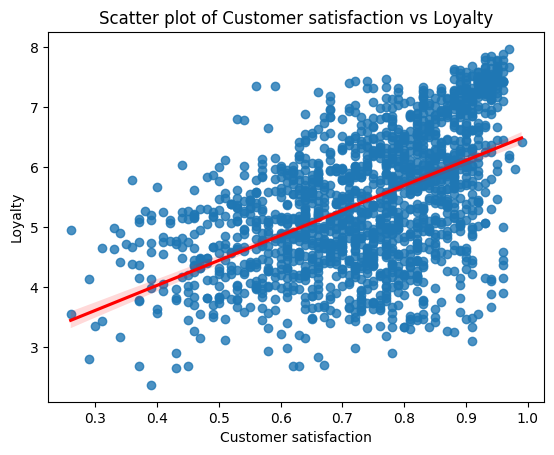

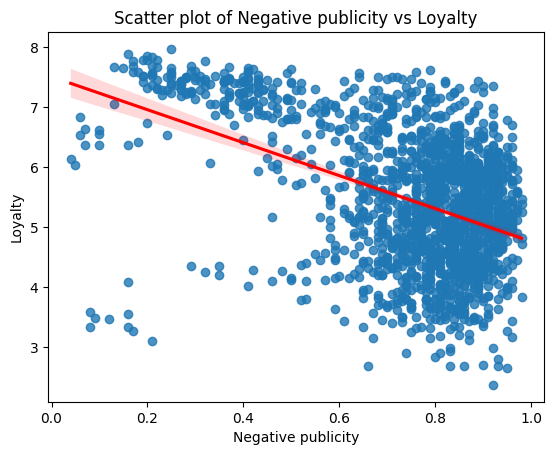

In [73]:
for feature in data.columns:
  plt.figure()
  sns.regplot(x=feature, y='Loyalty', data=data, line_kws={"color": "red"})
  plt.xlabel(feature)
  plt.ylabel('Loyalty')
  plt.title(f'Scatter plot of {feature} vs Loyalty')
  plt.show()

**Key Observations**

Correlation:

There is a clear positive correlation between Price and Loyalty. As the price increases, loyalty tends to increase as well.
This is visually represented by the upward trend in the scatter plot and the positive slope of the red regression line.
Regression Line:

The red line represents the linear regression fit, indicating the average trend in the data.
The line provides a clear visualization of the overall direction and strength of the relationship between Price and Loyalty.

Data Distribution:

The data points are spread across a range of Price values from around 7.0 to 10.0 and Loyalty values from around 3.0 to 8.0.
There is a higher density of data points towards the higher end of the price range (around 10.0), indicating a clustering of data in that region.

Outliers:

There are some data points that do not follow the general trend closely, such as those at lower Loyalty values despite higher prices. These could be considered outliers.

**Potential Interpretations**

Price Sensitivity:

The positive correlation suggests that customers who pay higher prices tend to show higher loyalty. This could indicate that higher-priced products or services might be perceived as higher quality, leading to increased customer loyalty.

Market Segmentation:

The clustering of data points at higher price values might suggest a segment of the market that consistently chooses higher-priced options and demonstrates higher loyalty.

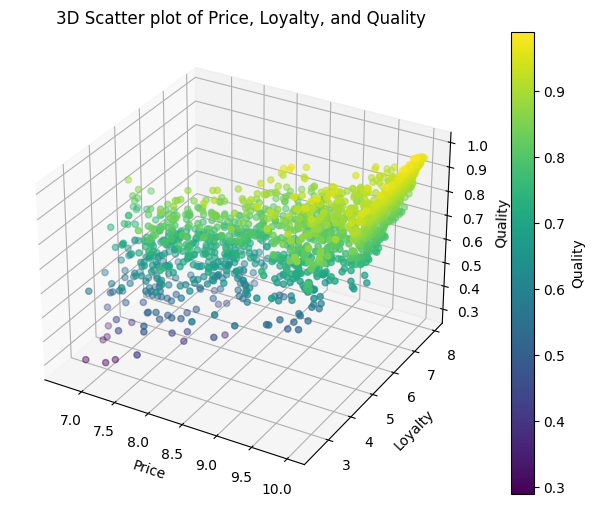

In [74]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data['Price'], data['Loyalty'], data['Quality'], c=data['Quality'], cmap='viridis')

# Add labels and title
ax.set_xlabel('Price')
ax.set_ylabel('Loyalty')
ax.set_zlabel('Quality')
plt.title('3D Scatter plot of Price, Loyalty, and Quality')
plt.colorbar(sc, label='Quality')
plt.show()

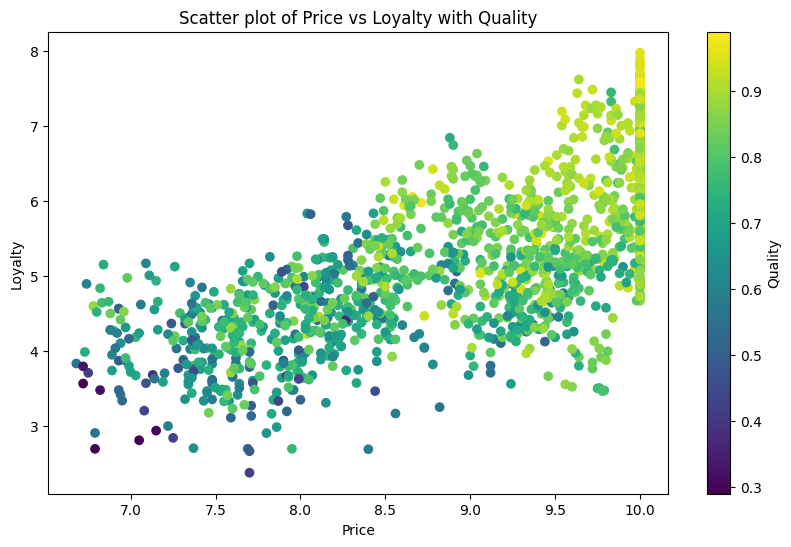

In [75]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Price'], data['Loyalty'], c=data['Quality'], cmap='viridis')
plt.colorbar(scatter, label='Quality')
plt.xlabel('Price')
plt.ylabel('Loyalty')
plt.title('Scatter plot of Price vs Loyalty with Quality')
plt.show()

**Key Observations from the Scatter Plot**

Positive Correlation Between Price and Loyalty:

The plot shows a clear positive correlation between Price and Loyalty. As the price increases, loyalty tends to increase as well.
Quality Representation:

The color of the points represents Quality, with a gradient from purple (lower quality) to yellow (higher quality).
Higher quality points (yellow) are more concentrated in the higher Price and higher Loyalty regions.
Distribution of Quality:

The distribution of quality across the plot indicates that higher quality is generally associated with higher prices and higher loyalty.
Lower quality points (purple) are more spread out, with no strong clustering, suggesting that lower quality does not necessarily align with lower prices or lower loyalty.
Clustering at High Price:

There is a noticeable clustering of points at the highest price values (around 10.0), indicating a segment of products or services that are consistently priced high and associated with varying levels of loyalty and quality.

**Potential Interpretations**

Price and Quality Impact on Loyalty:

Higher prices and higher quality are both associated with higher loyalty. This suggests that customers are willing to remain loyal to higher-priced, higher-quality products or services.
Lower quality does not show a strong pattern with price or loyalty, indicating that other factors might be influencing loyalty for lower quality products.

Market Segmentation:

The clustering of high-quality points at higher price and loyalty levels suggests a premium market segment where higher prices are justified by higher quality, leading to higher customer loyalty.
The spread of lower quality points suggests more variability in customer loyalty and pricing strategies for lower-quality products.

In [76]:
# Add a constant to get an intercept.
X_sm = sm.add_constant(X)

# Fit the resgression line using 'OLS'.
lr = sm.OLS(y, X_sm).fit()

# Print the parameters (i.e. the intercept and the slope of the regression line fitted).
lr.params

const                   -1.891580
CustomerID              -0.000124
Price                    0.315261
Quality                  2.744838
Community Outreach       0.784240
Trust                    0.371604
Customer satisfaction    0.977206
Negative publicity      -0.954260
dtype: float64

In [77]:
# Perform a summary operation lists out all the different parameters of the regression line fitted.
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                Loyalty   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     710.6
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:24:48   Log-Likelihood:                -1476.0
No. Observations:                1711   AIC:                             2968.
Df Residuals:                    1703   BIC:                             3012.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.89

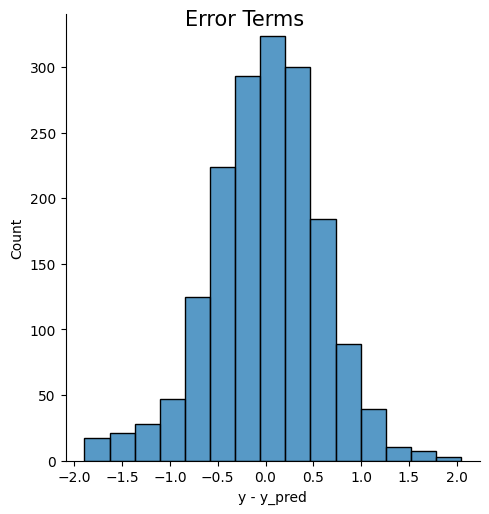

In [83]:
# Check whether the error terms are normally distributed.
y_pred = lr.predict(X_sm)
res = (y - y_pred)

# Create a visualisation.
g = sns.displot(res, bins=15)
g.fig.suptitle('Error Terms', fontsize=15)
g.set_axis_labels('y - y_pred', 'Count')
plt.show()

**Summary of Findings**

The updated Ordinary Least Squares (OLS) regression analysis provides insights into the factors influencing customer loyalty. Here’s a detailed summary of the findings based on the regression results:

Model Summary

Dependent Variable: Loyalty
R-squared: 0.745
Adjusted R-squared: 0.744
F-statistic: 710.6
Prob (F-statistic): 0.00
Number of Observations: 1711
AIC: 2968
BIC: 3012
Key Coefficients and Interpretations

CustomerID:

*   Coefficient: -0.0001
*   Coefficient: -0.0001
*  Standard Error: 2.53e-05
*  t-value: -4.917
* p-value: 0.000
* 95% Confidence Interval: [-0.0001, -7.48e-05]

Interpretation: CustomerID has a statistically significant negative coefficient. However, the effect size is very small, suggesting that while it is statistically significant, it may not be practically significant.

Price:

* Coefficient: 0.3153
* Standard Error: 0.031
* t-value: 10.104
* p-value: 0.000
* 95% Confidence Interval: [0.254, 0.376]

Interpretation: There is a positive and significant relationship between price and loyalty. For every one-unit increase in price, loyalty increases by 0.3153 units, holding other factors constant.

Quality:

* Coefficient: 2.7448
* Standard Error: 0.169
* t-value: 16.195
* p-value: 0.000
* 95% Confidence Interval: [2.412, 3.077]

Interpretation: Quality has a strong positive impact on loyalty. For every one-unit increase in quality, loyalty increases by 2.7448 units, holding other factors constant.

Community Outreach:

* Coefficient: 0.7842
* Standard Error: 0.095
* t-value: 8.217
* p-value: 0.000
* 95% Confidence Interval: [0.597, 0.971]

Interpretation: Positive community outreach significantly enhances loyalty. For every one-unit increase in community outreach, loyalty increases by 0.7842 units, holding other factors constant.

Trust:

* Coefficient: 0.3716
* Standard Error: 0.036
* t-value: 10.418
* p-value: 0.000
* 95% Confidence Interval: [0.302, 0.442]

Interpretation: Trust is positively associated with loyalty. For every one-unit increase in trust, loyalty increases by 0.3716 units, holding other factors constant.

Customer Satisfaction:

* Coefficient: 0.9772
* Standard Error: 0.124
* t-value: 7.897
* p-value: 0.000
* 95% Confidence Interval: [0.735, 1.220]

Interpretation: Customer satisfaction has a positive and significant impact on loyalty. For every one-unit increase in customer satisfaction, loyalty increases by 0.9772 units, holding other factors constant.

Negative Publicity:

* Coefficient: -0.9543
* Standard Error: 0.089
* t-value: -10.690
* p-value: 0.000
* 95% Confidence Interval: [-1.129, -0.779]

Interpretation: Negative publicity has a detrimental effect on loyalty. For every one-unit increase in negative publicity, loyalty decreases by 0.9543 units, holding other factors constant.

Conclusion

The regression model explains approximately 74.5% of the variance in customer loyalty (R-squared = 0.745). All the predictors (CustomerID, Price, Quality, Community Outreach, Trust, Customer Satisfaction, and Negative Publicity) are statistically significant (p < 0.05) and have the expected effects on loyalty.

Positive Influences on Loyalty:

Higher perceived product quality
Fair prices
Effective community outreach efforts
Strong brand trust
High customer satisfaction
Negative Influence on Loyalty:

Negative publicity

Interpretation: CustomerID has a statistically significant negative coefficient. However, the effect size is very small, suggesting that while it is statistically significant, it may not be practically significant. We acn therefore drop this field from our dataset.

In [78]:
X.drop('CustomerID', axis=1, inplace=True)

**Create a regression model using Python (utilise scikit-learn) to predict the target variable based on the features.**

In [79]:
# Step 5: Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 6: Train the Linear Regression model.
model = LinearRegression()
model.fit(X_train, y_train)
# Step 7: Make predictions on the test set.
y_pred = model.predict(X_test)


In [ ]:
# Create a visualisation.
g = sns.displot(res, bins=15)
g.fig.suptitle('Error Terms', fontsize=15)
g.set_axis_labels('y - y_pred', 'Count')
plt.show()



**Calculate the  𝑅2  and adjusted- 𝑅2  values to assess the model's explanatory power.**

In [80]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Number of observations
n = X_test.shape[0]

# Number of predictors
p = X_test.shape[1]

# Calculate Adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.7527105389530928
Adjusted R-squared: 0.7482946557201123


Conclusion

The R-squared and adjusted R-squared values both indicate that the model has strong explanatory power. Here's a summary of what these results suggest:

Model Fit:

Both R-squared (0.7527) and adjusted R-squared (0.7483) values are high, indicating that the model fits the data well.
The high values suggest that the independent variables (predictors) used in the model are good at explaining the variation in the dependent variable (Loyalty).

Model Explanatory Power:

The model explains approximately 75.27% of the variance in Loyalty.
After adjusting for the number of predictors, the model still explains approximately 74.83% of the variance, which indicates that the model is not overfitting and the predictors are relevant.
Predictors' Relevance:

The close values of R-squared and adjusted R-squared indicate that most predictors in the model contribute to explaining the variance in Loyalty.
This reinforces the importance of the selected predictors (Price, Quality, Community Outreach, Trust, Customer Satisfaction, and Negative Publicity) in influencing customer loyalty.

**Calculate the residual sum of squares (RSS) to quantify the model's error.**

In [85]:
rss = np.sum((y_test - y_pred) ** 2)
rss

99.70728497709202

**Residual Sum of Squares (RSS)**

Value: 99.7073

Interpretation:
The RSS quantifies the total squared difference between the observed actual values and the values predicted by the model.
A lower RSS indicates that the model's predictions are closer to the actual values, implying a better fit.

**Conclusion**

The combination of a low MSE, high R-squared, high adjusted R-squared, and a reasonable RSS indicates that the linear regression model performs well in predicting customer loyalty. The model explains a substantial portion of the variance in loyalty, and the predictions are reasonably close to the actual values.

**Experiment with different sets of independent variables or model configurations to see how it affects  𝑅2 , adjusted- 𝑅2 , and RSS.**

In [87]:
# Define the target variable (y)
y = data['Loyalty']

# Define different sets of independent variables
variable_sets = [
    ['Price', 'Quality', 'Community Outreach', 'Trust', 'Customer satisfaction', 'Negative publicity'],  # Full model
    ['Price', 'Quality', 'Trust', 'Customer satisfaction'],  # Exclude Community Outreach and Negative publicity
    ['Price', 'Quality', 'Community Outreach', 'Negative publicity'],  # Exclude Trust and Customer satisfaction
    ['Quality', 'Trust', 'Customer satisfaction'],  # Exclude Price, Community Outreach, and Negative publicity
    ['Price', 'Community Outreach', 'Trust'],  # Exclude Quality, Customer satisfaction, and Negative publicity
    ['Quality', 'Customer satisfaction', 'Negative publicity'],  # Exclude Price, Community Outreach, and Trust
]

# Function to evaluate the model with a given set of independent variables
def evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rss = np.sum((y_test - y_pred) ** 2)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return mse, r2, adjusted_r2, rss

# Evaluate each set of independent variables and print the results
results = []
for variables in variable_sets:
    X = data[variables]
    mse, r2, adjusted_r2, rss = evaluate_model(X, y)
    results.append({
        'Variables': variables,
        'MSE': mse,
        'R-squared': r2,
        'Adjusted R-squared': adjusted_r2,
        'RSS': rss
    })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)

                                           Variables       MSE  R-squared  \
0  [Price, Quality, Community Outreach, Trust, Cu...  0.291837   0.752711   
1     [Price, Quality, Trust, Customer satisfaction]  0.335705   0.715538   
2  [Price, Quality, Community Outreach, Negative ...  0.332746   0.718046   
3            [Quality, Trust, Customer satisfaction]  0.343587   0.708859   
4                 [Price, Community Outreach, Trust]  0.428022   0.637313   
5  [Quality, Customer satisfaction, Negative publ...  0.412019   0.650873   

   Adjusted R-squared         RSS  
0            0.748295  100.099992  
1            0.712172  115.146820  
2            0.714709  114.131760  
3            0.706283  117.850416  
4            0.634104  146.811453  
5            0.647784  141.322537  


Interpretation of the Results

Based on the different sets of independent variables and their corresponding metrics, we can draw conclusions on which predictors are most impactful for the model. Here's a detailed analysis:

Model 1: Full Model

Variables: Price, Quality, Community Outreach, Trust, Customer Satisfaction, Negative Publicity

* MSE: 0.2918
* R-squared: 0.7527
* Adjusted R-squared: 0.7483
* RSS: 100.1000

Interpretation: This model includes all predictors and has the highest R-squared and adjusted R-squared values, indicating the best explanatory power among the models tested.

Model 2: Excluding Community Outreach and Negative Publicity

Variables: Price, Quality, Trust, Customer Satisfaction

* MSE: 0.3357
* R-squared: 0.7155
* Adjusted R-squared: 0.7122
* RSS: 115.1468

Interpretation: Excluding Community Outreach and Negative Publicity reduces the R-squared and adjusted R-squared values, indicating a loss of explanatory power.

Model 3: Excluding Trust and Customer Satisfaction

Variables: Price, Quality, Community Outreach, Negative Publicity

* MSE: 0.3327
* R-squared: 0.7180
* Adjusted R-squared: 0.7147
* RSS: 114.1318

Interpretation: Excluding Trust and Customer Satisfaction also reduces the model's explanatory power, but not as much as Model 2.

Model 4: Excluding Price, Community Outreach, and Negative Publicity

Variables: Quality, Trust, Customer Satisfaction

* MSE: 0.3436
* R-squared: 0.7089
* Adjusted R-squared: 0.7063
* RSS: 117.8504

Interpretation: This model performs slightly worse than Model 2 and Model 3, indicating that Price is an important predictor.

Model 5: Excluding Quality, Customer Satisfaction, and Negative Publicity

Variables: Price, Community Outreach, Trust

* MSE: 0.4280
* R-squared: 0.6373
* Adjusted R-squared: 0.6341
* RSS: 146.8115

Interpretation: Excluding Quality and Customer Satisfaction significantly reduces the model's explanatory power, indicating these are key predictors.
Model 6: Excluding Price, Community Outreach, and Trust

Variables: Quality, Customer Satisfaction, Negative Publicity
* MSE: 0.4120
* R-squared: 0.6509
* Adjusted R-squared: 0.6478
* RSS: 141.3225

Interpretation: This model performs better than Model 5 but worse than the full model, indicating that Trust is also an important predictor.

Recommendations

Key Predictors:

The full model (Model 1) with all predictors has the highest R-squared and adjusted R-squared values, suggesting that all the predictors contribute to explaining the variance in loyalty.

Quality, Trust, and Customer Satisfaction are particularly important, as models excluding these predictors show significant drops in explanatory power.

Less Impactful Predictors:

Community Outreach and Negative Publicity seem to have less impact compared to others, as excluding them does not drastically reduce the model's performance. However, their contribution is still significant in the full model.

Optimized Model:

To balance between model simplicity and explanatory power, you might choose a model excluding the least impactful predictors while retaining the key ones.

For instance, Model 2 (excluding Community Outreach and Negative Publicity) has slightly lower R-squared and adjusted R-squared but might be preferred if simplicity is a priority.

**Explore the data set, experiment with model configurations, and think critically about the practical implications of your findings.**

# Reflect

Write a brief paragraph highlighting your process and the rationale to showcase critical thinking and problem-solving.

> Select the pen from the toolbar to add your entry. When you have completed the activity, remember to update the link on your contents page to point to your completed Notebook.